Author: KuoChen Huang

### (HW3) Time Series Classification Part 1: Feature Creation/Extraction

#### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
# Storing training and testing datasets
folder = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
 
#training_df = pd.DataFrame()
training_list = list()
training_count = 0
#testing_df = pd.DataFrame()
testing_list = list()
testing_count = 0

directory_path = '../data/AReM/'
dataset_num = 2

for folder in folder:
    if folder not in ['bending1', 'bending2']:
        dataset_num = 3
        
    temp_directory_path = directory_path + folder   
    files_in_path = len(os.listdir(temp_directory_path))
    
    for dataset_index in range(files_in_path):
        accurate_directory_path = temp_directory_path + '/dataset' + str(dataset_index + 1) + '.csv'
        
        df = pd.read_csv(accurate_directory_path, skiprows = 5, header = None, names = columns)
        
        # check to merge into traing or testing dataset(index<=2/3 --> training; index>2/3 --> testing)
        if dataset_index + 1 <= dataset_num:
            #testing_df = testing_df.append(df, ignore_index=True)
            testing_list.append(df)
            testing_count += len(df)
        else:
            #training_df = training_df.append(df, ignore_index=True)
            training_list.append(df)
            training_count += len(df)

In [3]:
'''# check if dataset contains any NAN value
print('=========== NAN in Training set ===========')
print(training_list.isnull().sum())
print('=========== NAN in Testing set ===========')
print(testing_df.isnull().sum())'''
# shape
print('=========== Shape ===========')
print('training set: ', training_count)
print('testing set: ', testing_count)

=========== Shape ===========
training set:  33119
testing set:  9120


#### (c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

##### i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

"Means" in each of the 𝑑 dimensions  
"Standard deviations" of the 𝑑 dimensions  
"Skewness", "Kurtosis" and "Higher order moments" of the 𝑑 dimensions  
"Maximum" and "Minimum" values

reference: https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

##### ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [4]:
def fill_info(info_df, index, info):
    df = pd.DataFrame()
    for person_index in range(1,7):
        df.loc[index, 'min' + '(' + str(person_index) + ')'] = info.loc['min'][person_index]
        df.loc[index, 'max' + '(' + str(person_index) + ')'] = info.loc['max'][person_index]
        df.loc[index, 'median' + '(' + str(person_index) + ')'] = info.loc['50%'][person_index]
        df.loc[index, 'std' + '(' + str(person_index) + ')'] = info.loc['std'][person_index]
        df.loc[index, '25%' + '(' + str(person_index) + ')'] = info.loc['25%'][person_index]
        df.loc[index, '75%' + '(' + str(person_index) + ')'] = info.loc['75%'][person_index]
    return info_df.append(df, ignore_index = True)

In [5]:
info_df = pd.DataFrame()

for index in range(len(training_list)):
    training_info = training_list[index].describe()
    info_df = fill_info(info_df, index, training_info)

for index in range(len(testing_list)):
    testing_info = testing_list[index].describe()
    info_df = fill_info(info_df, index, testing_info)  
    
info_df.index = np.arange(1, len(info_df)+1)

In [6]:
info_df

min(1)  max(1)  median(1)    std(1)  25%(1)   75%(1)  min(2)  max(2)  \
1    35.00   47.40     44.330  1.558835   43.00  45.0000     0.0    1.70   
2    33.00   47.75     43.500  3.670666   39.15  45.0000     0.0    3.00   
3    33.00   45.75     41.750  2.243490   41.33  42.7500     0.0    2.83   
4    37.00   48.00     43.250  1.386098   42.50  45.0000     0.0    1.58   
5    36.25   48.00     44.500  1.618364   43.31  44.6700     0.0    1.50   
..     ...     ...        ...       ...     ...      ...     ...     ...   
84   35.50   46.25     43.670  1.989052   42.50  44.5000     0.0    2.12   
85   32.75   47.00     44.500  3.398919   41.33  45.3725     0.0    3.34   
86   19.33   43.50     35.500  4.889576   30.50  37.7500     0.0   14.50   
87   12.50   45.00     34.125  4.850923   30.50  36.7500     0.0   13.05   
88   15.00   46.75     35.000  5.315110   31.00  38.2500     0.0   13.44   

    median(2)    std(2)  ...  median(5)    std(5)   25%(5)  75%(5)  min(6)  \
1       0.470  0.338690  ...     36.000  1.999604  35.3625  36.500     0.0   
2       0.500  0.630860  ...     35.000  3.849448  30.4575  36.330     0.0   
3       0.500  0.405469  ...     30.000  2.411026  28.4575  31.250     0.0   
4       0.470  0.315566  ...     23.500  2.488862  22.2500  24.000     0.0   
5       0.470  0.263111  ...     21.670  3.318301  20.5000  23.750     0.0   
..        ...       ...  ...        ...       ...      ...     ...     ...   
84      0.500  0.307413  ...     14.670  2.983976  12.7500  16.500     0.0   
85      0.470  0.446511  ...     16.585  4.296574  13.0000  18.565     0.0   
86      3.630  2.271102  ...     16.670  3.092094  14.7500  18.670     0.0   
87      4.085  2.338685  ...     16.750  3.133564  14.6275  18.750     0.0   
88      3.900  2.480206  ...     16.330  3.155015  14.2500  18.500     0.0   

    max(6)  median(6)    std(6)  25%(6)  75%(6)  
1     1.79      0.430  0.513506   0.000   0.940  
2     2.18      0.500  0.524317   0.000   1.000  
3     1.79      0.430  0.389164   0.000   0.500  
4     5.26      0.500  0.622534   0.430   0.870  
5     2.96      0.490  0.487826   0.000   0.830  
..     ...        ...       ...     ...     ...  
84    5.72      0.830  0.666161   0.470   1.220  
85    5.73      0.710  0.722165   0.430   1.090  
86    9.74      3.100  1.792090   2.105   4.425  
87    8.96      3.085  1.787360   2.060   4.440  
88    8.99      3.000  1.630983   2.120   4.240  

[88 rows x 36 columns]

##### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [7]:
from scipy.stats import bootstrap
from scipy.stats import t
import collections

In [8]:
def BootStrap(df, samplingTimes): 
    std_each_time = list() # to store the std we calculate from each sampling
    
    # iterate n times(i set the sampling times as 1000 in hw3)
    for i in range(samplingTimes):
        # randomly selecting rows and rebuilding the sampling dataset
        index = np.random.randint(0, len(df), size = len(df))
        sample_df = df.iloc[index]

        sample_std = np.std(sample_df)
        std_each_time.append(sample_std)
        
    return std_each_time

In [9]:
def CI_calculating(data, confidence):
    data = np.array(data)
    m = data.mean()
    s = data.std()
    dof = len(data)-1
    
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    return (m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data)))

In [10]:
std_info = collections.defaultdict(list)

for col in info_df.columns:
    # calculate std
    std_info[col].append(info_df[col].std())
    
    # calculate confidnece interval using bootstrap
    subset = info_df[col]
    subset_bootstrap = BootStrap(subset, 1000)
    std_info[col].append(CI_calculating(subset_bootstrap, 0.9))

print(pd.DataFrame.from_dict(std_info, orient='index', columns = ['std', 'interval']))

                std                                     interval
min(1)     9.569975         (9.41986446436775, 9.49978963312513)
max(1)     4.394362       (4.292301749854503, 4.354070570600684)
median(1)  5.440054       (5.342178920966465, 5.380252078059233)
std(1)     1.772153     (1.7451692016860132, 1.7570944628517398)
25%(1)     6.153590       (6.062718706830636, 6.096699496736307)
75%(1)     5.138925         (5.041044091354186, 5.0900282836191)
min(2)     0.000000                                   (0.0, 0.0)
max(2)     5.062729       (4.996675322225445, 5.020202063622562)
median(2)  1.412244     (1.3920947503675138, 1.4019951670860704)
std(2)     0.884105     (0.8735392956117268, 0.8778515842075957)
25%(2)     0.946386     (0.9286386847467537, 0.9352838116346368)
75%(2)     2.125266     (2.0954853138501783, 2.1083499600104783)
min(3)     2.956462      (2.914504674261043, 2.9257043216884226)
max(3)     4.875137       (4.783719826684601, 4.822793546948692)
median(3)  4.036396      

##### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

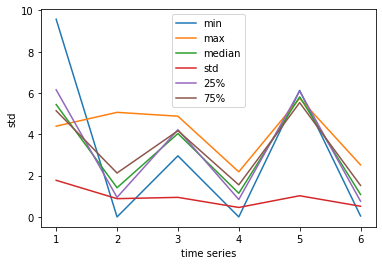

In [11]:
import matplotlib.pyplot as plt
k_range = np.arange(1, 7)
std_df = pd.DataFrame.from_dict(std_info, orient='index', columns = ['std', 'interval'])

s_min = [col for col in info_df if 'min' in col]
s_max = [col for col in info_df if 'max' in col]
s_median = [col for col in info_df if 'median' in col]
s_std = [col for col in info_df if 'std' in col]
s_25 = [col for col in info_df if '25%' in col]
s_75 = [col for col in info_df if '75%' in col]

plt.plot(k_range, std_df.loc[s_min]['std'], label = 'min')
plt.plot(k_range, std_df.loc[s_max]['std'], label = 'max')
plt.plot(k_range, std_df.loc[s_median]['std'], label = 'median')
plt.plot(k_range, std_df.loc[s_std]['std'], label = 'std')
plt.plot(k_range, std_df.loc[s_25]['std'], label = '25%')
plt.plot(k_range, std_df.loc[s_75]['std'], label = '75%')

plt.legend()
#plt.grid(True)
plt.xlabel('time series')
plt.ylabel('std')
plt.show()

I would choose "std", "25%", "median" as my features

## Questions (HW4 Starts Here)

### (a) Binary Classification Using Logistic Regression

#### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

In [12]:
# create dataframe of training datasets
training_stat_df = pd.DataFrame() 
#stat_df_temp = pd.DataFrame() 

for i in range(len(training_list)):
    temp = pd.DataFrame(training_list[i])[['avg_rss12', 'var_rss12', 'var_rss23']]
    stat = temp.describe()
    
    df = pd.DataFrame()
    
    df.loc[i, str('avg_rss12') + '(' + 'std' + ')'] = stat.loc['std']['avg_rss12']
    df.loc[i, str('avg_rss12') + '(' + '25%' + ')'] = stat.loc['25%']['avg_rss12']
    df.loc[i, str('avg_rss12') + '(' + 'median' + ')'] = stat.loc['mean']['avg_rss12']
    
    df.loc[i, str('var_rss12') + '(' + 'std' + ')'] = stat.loc['std']['var_rss12']
    df.loc[i, str('var_rss12') + '(' + '25%' + ')'] = stat.loc['25%']['var_rss12']
    df.loc[i, str('var_rss12') + '(' + 'median' + ')'] = stat.loc['mean']['var_rss12']
    
    df.loc[i, str('var_rss23') + '(' + 'std' + ')'] = stat.loc['std']['var_rss23']
    df.loc[i, str('var_rss23') + '(' + '25%' + ')'] = stat.loc['25%']['var_rss23']
    df.loc[i, str('var_rss23') + '(' + 'median' + ')'] = stat.loc['mean']['var_rss23']
    
    if i<9:
        df['bending'] = 'True'
    else:
        df['bending'] = 'False'
    training_stat_df = training_stat_df.append(df, ignore_index = True)
    

In [13]:
training_stat_df

avg_rss12(std)  avg_rss12(25%)  avg_rss12(median)  var_rss12(std)  \
0         1.558835           43.00          43.954500        0.338690   
1         3.670666           39.15          42.179813        0.630860   
2         2.243490           41.33          41.678063        0.405469   
3         1.386098           42.50          43.454958        0.315566   
4         1.618364           43.31          43.969125        0.263111   
..             ...             ...                ...             ...   
64        4.650935           30.25          33.586875        2.461077   
65        4.752477           31.00          34.322750        2.599284   
66        4.842294           31.25          34.546229        2.360448   
67        4.531720           31.75          34.873229        2.435437   
68        4.796705           31.25          34.473188        2.388746   

    var_rss12(25%)  var_rss12(median)  var_rss23(std)  var_rss23(25%)  \
0             0.00           0.426250        0.513506          0.0000   
1             0.00           0.696042        0.524317          0.0000   
2             0.43           0.535979        0.389164          0.0000   
3             0.00           0.378083        0.622534          0.4300   
4             0.43           0.413125        0.487826          0.0000   
..             ...                ...             ...             ...   
64            2.87           4.576562        1.640243          2.0500   
65            2.49           4.456333        1.732727          2.1575   
66            2.49           4.371958        1.656742          2.1600   
67            2.50           4.380583        1.690960          2.1700   
68            2.49           4.359312        1.699114          2.1200   

    var_rss23(median) bending  
0            0.493292    True  
1            0.613521    True  
2            0.383292    True  
3            0.679646    True  
4            0.555313    True  
..                ...     ...  
64           3.259729   False  
65           3.432562   False  
66           3.338125   False  
67           3.424646   False  
68           3.340458   False  

[69 rows x 10 columns]

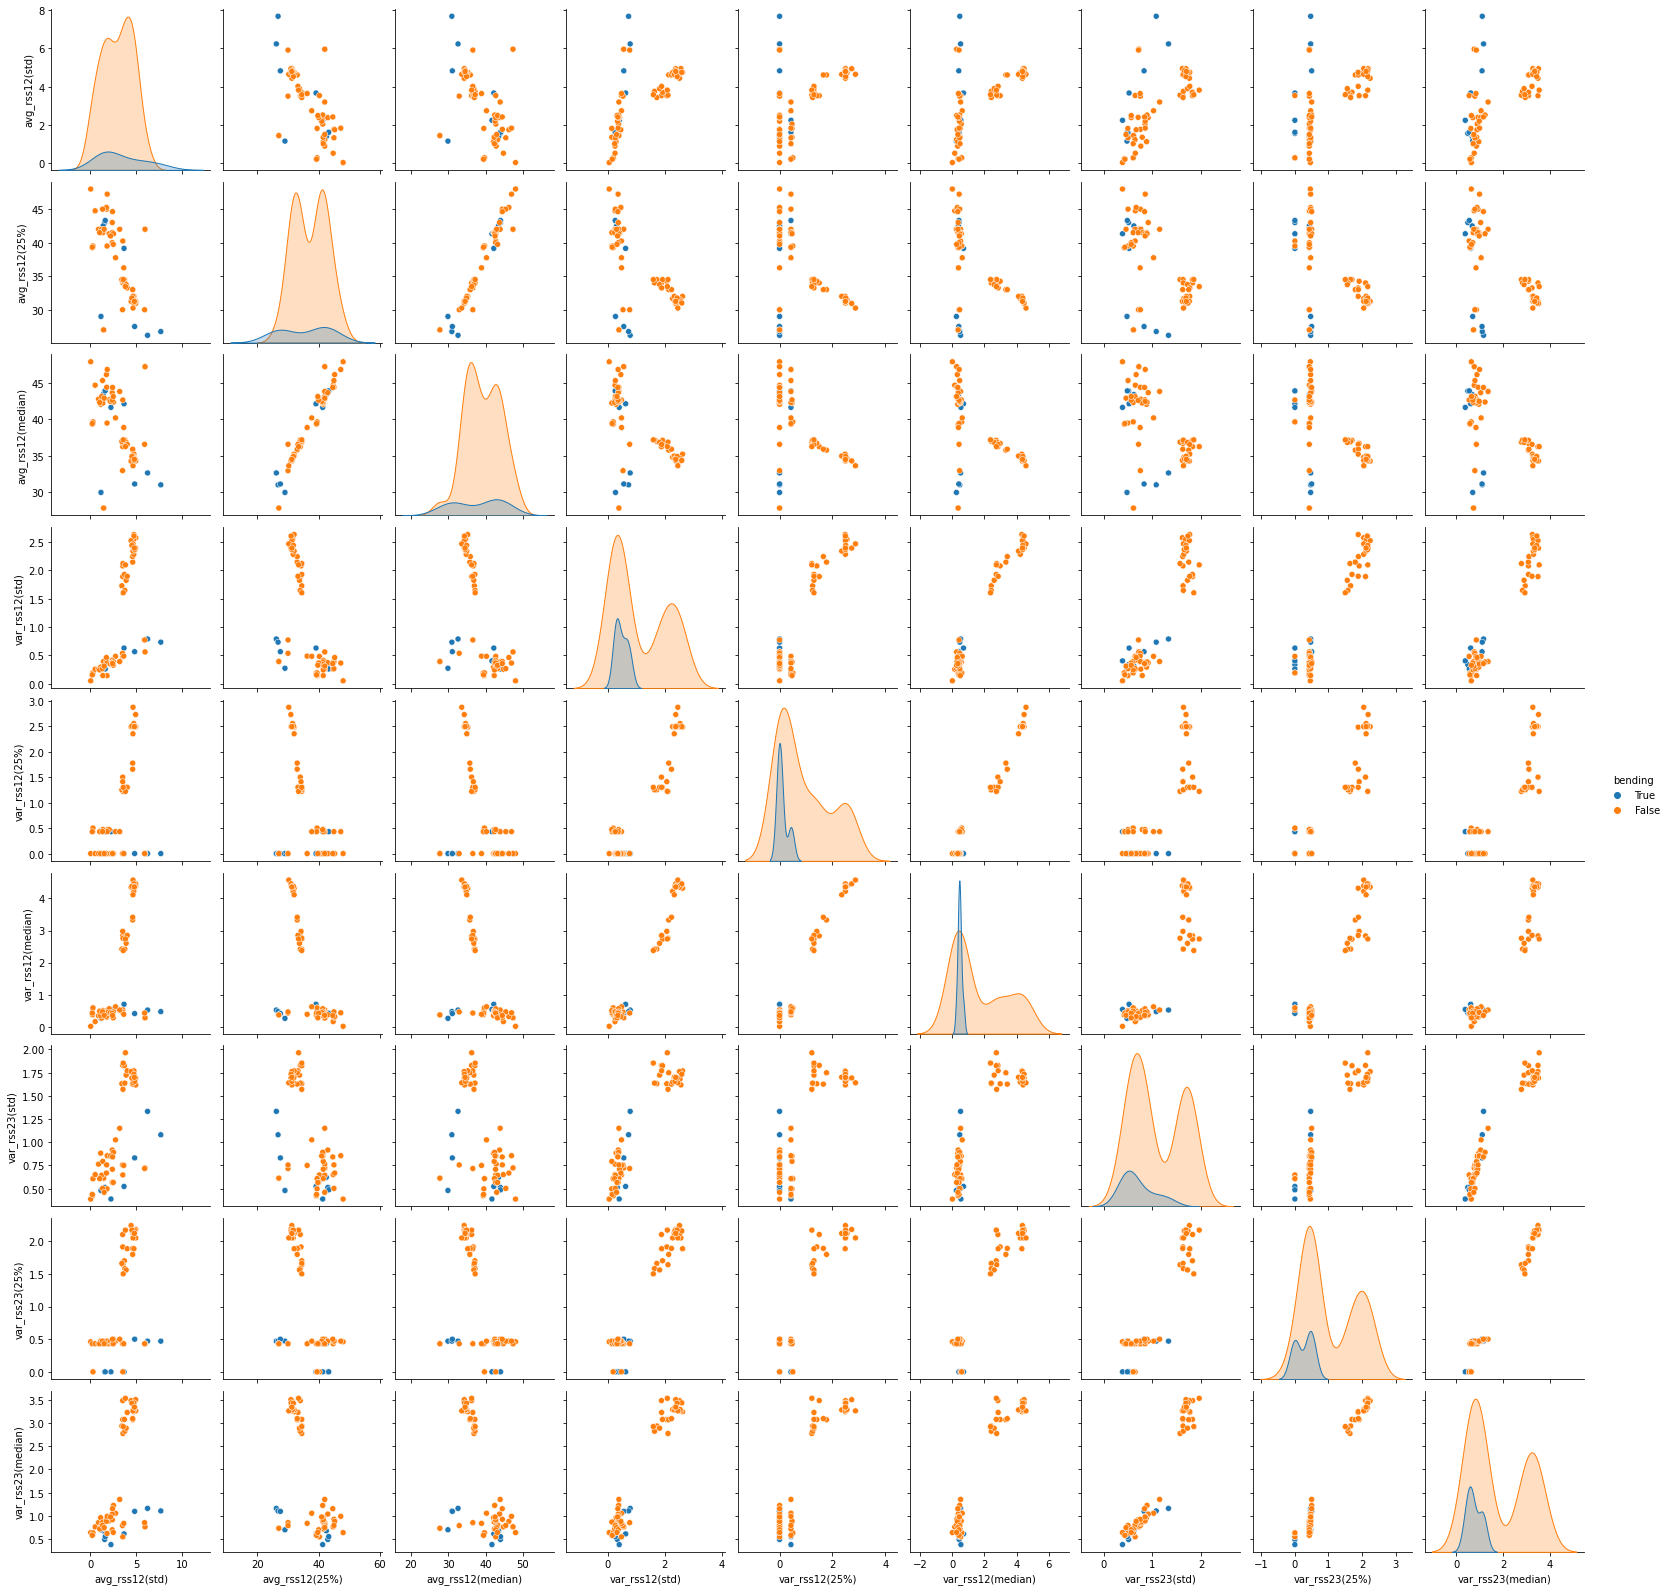

In [14]:
sns.pairplot(training_stat_df, hue = "bending", kind='scatter')
plt.show()

#### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 4(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 4(a)i?

In [15]:
for i in range(len(training_list)):  
    # label bending or not
    if i<9:
        training_list[i]['bending'] = 'True'
    else:
        training_list[i]['bending'] = 'False'

In [16]:
# It might run for 1 min, please wait for a while, thanks!

# split 6 time series into 12
training_half_list = list()
target_col = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

for i in range(len(training_list)):
    temp = pd.DataFrame()
    for row in range(len(training_list[i])):
        for col in training_list[i].columns:
            if col in target_col:
                # Here since I dont want top half contains all bending example and the bottom half contains others
                # So I split by row index(odd or even)
                if row%2 == 0:
                    temp.loc[int(row/2), str(col) + '(' + 'even' + ')'] = training_list[i].loc[row, col]
                else:
                    temp.loc[int(row/2), str(col) + '(' + 'odd' + ')'] = training_list[i].loc[row, col]

            temp.loc[int(row/2), 'bending'] = training_list[i].loc[row, 'bending']
    training_half_list.append(temp)

In [17]:
training_half_stat_df = pd.DataFrame() 


for i in range(len(training_half_list)):
    temp = pd.DataFrame(training_half_list[i])[['avg_rss12(even)', 'var_rss12(even)', 'var_rss23(even)',  
                                           'avg_rss12(odd)', 'var_rss12(odd)', 'var_rss23(odd)']]
    stat = temp.describe()  
    df = pd.DataFrame()

    for col in stat:
        df.loc[i, col + '(' + 'std' + ')'] = stat.loc['std'][col]
        df.loc[i, col + '(' + '25%' + ')'] = stat.loc['25%'][col]
        df.loc[i, col + '(' + 'median' + ')'] = stat.loc['mean'][col]
        
    df['bending'] = training_half_list[i]['bending'][0]

    training_half_stat_df = training_half_stat_df.append(df, ignore_index = True)

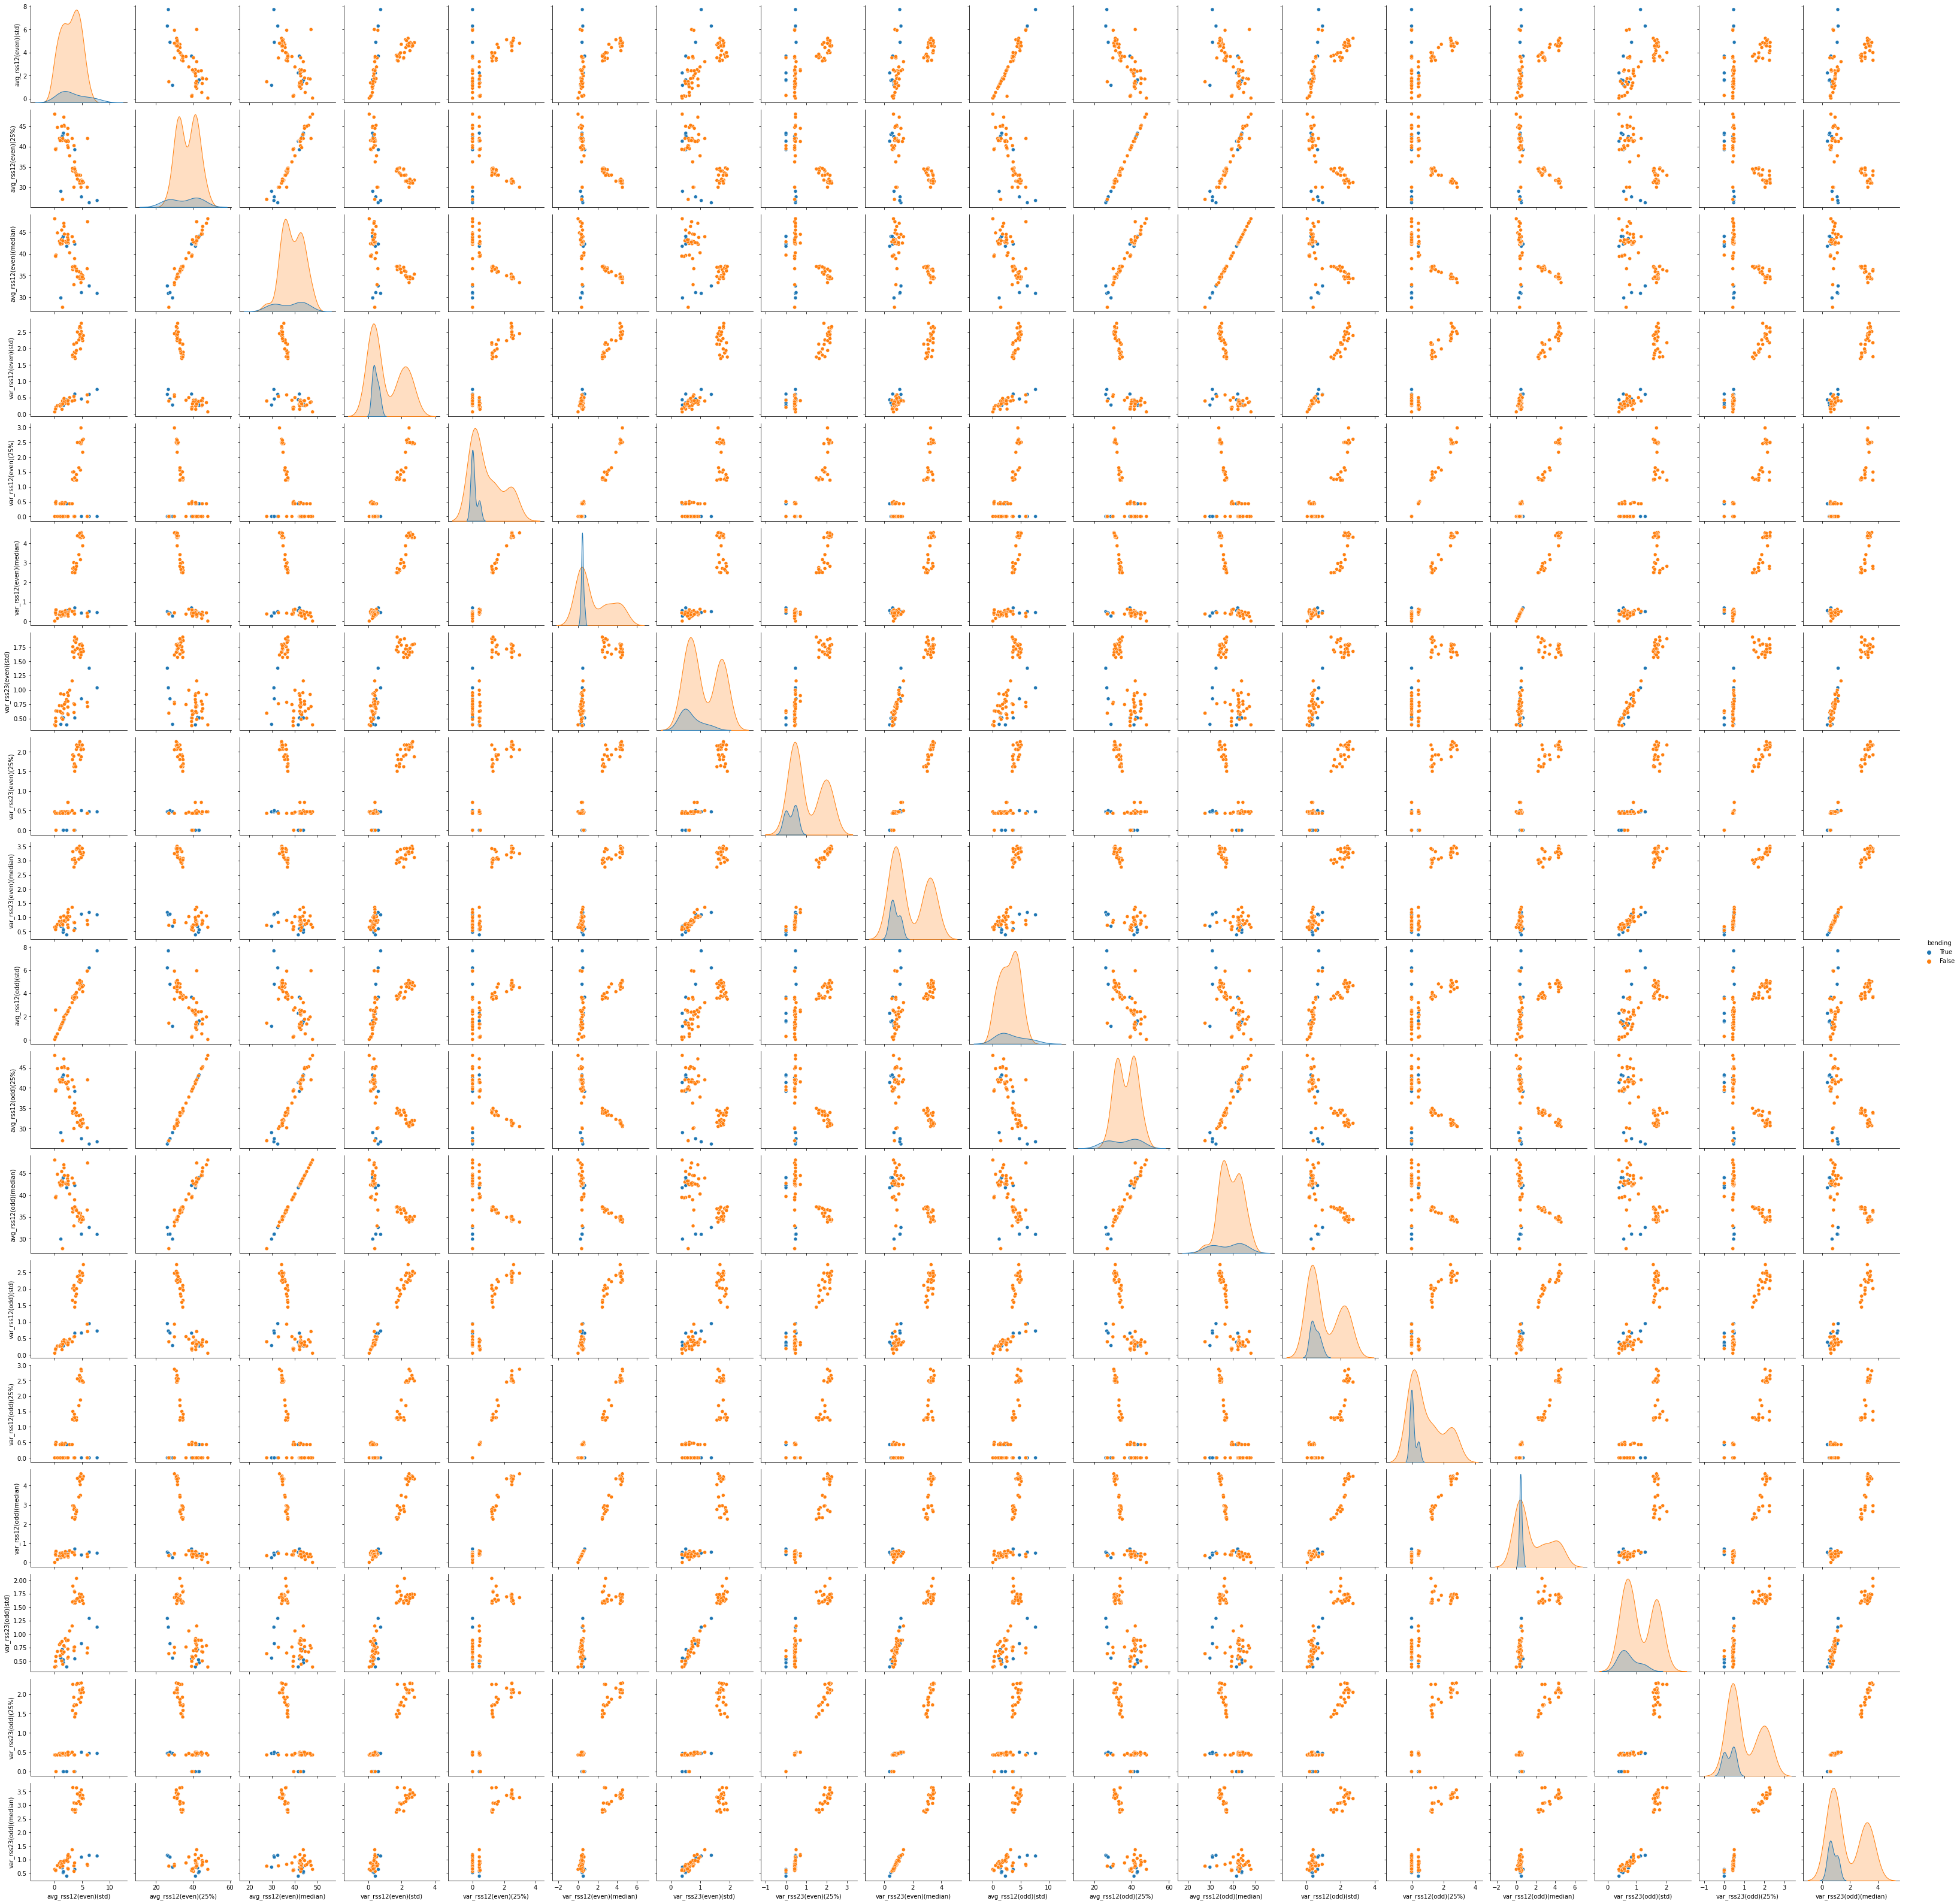

In [18]:
sns.pairplot(training_half_stat_df, hue = "bending", kind='scatter')
plt.show()

Actually, I think the two graphs(before splitting and after splitting) are almost the same... There's no considerable difference.

#### iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. 

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [20]:
def breakSeries(data, n):

    new_df = list()
    
    for dataset_no in range(len(data)):
        # to store the bending value first since we gonna remove the column
        bending = data[dataset_no]['bending']
        #data[dataset_no] = data[dataset_no].drop(['bending'], axis=1)
        
        # data[dataset_no] --> dataset(instance)
        size = round(len(data[dataset_no])/n)
        # break each dataset into n datasets(list_of_dfs)
        list_of_dfs = [data[dataset_no].drop(['bending'], axis=1).iloc[i:i+size-1,:] for i in range(0, len(data[dataset_no]),size)]

        tmpDf = pd.DataFrame()
        for size in range(n):
        # rearrange index for concating
            list_of_dfs[size].index = range(len(list_of_dfs[size]))
            #print(list_of_dfs)
        # delete 'time' column
            tmpDf = pd.concat([list_of_dfs[size].iloc[:, 1:], tmpDf], axis=1, ignore_index=True)
        tmpDf['bending'] = bending
            
        new_df.append(tmpDf)

    return new_df


In [21]:
def split_x_y(data):
    train_x = list()
    train_y = list()
    
    for instance in range(len(data)):
        train_x.append(data[instance].iloc[:,:-1])
        
        if data[instance].iloc[:,-1][0] == 'False':
            train_y.append(0)
        else:
            train_y.append(1)
        #train_y.append(data[instance].iloc[:,-1][0])
    
    return train_x, train_y

In [22]:
def cal_x_train(dataset):

    data = list()
    for df in dataset:
        temp = list()
        stat = df.describe()
        #print(stat)
        for col in stat:
            temp.append(stat.loc['std', col])
            temp.append(stat.loc['25%', col])
            temp.append(stat.loc['mean', col])
        
        data.append(temp)
    data = pd.DataFrame(data)
    return data

In [23]:
best_score = dict()

for n in range(1,21):
    # newTrain are 69 instances. We can not merge at this step since we still need to calculate the statistic info
    newTrain = breakSeries(training_list, n) 
    
    train_x_data, train_y = split_x_y(newTrain)
    
    train_x = cal_x_train(train_x_data) # x_train will have 6*n*3 features
    
    # we need to specify max_iter in the LogisticRegression to a higer value 
    # or we would get error(failed to converge)
    
    model = LogisticRegression(max_iter = 500)
    
    # create the RFE model and select best attributes
    # RFE: recursive feature elimination with cross-validation
    
    #For every step where "step" number of features are eliminated,  
    #it calculates the score on the validation data. 
    #The number of features left at the step which gives the maximum score on the validation data, 
    #is considered to be "the best n_features" of your data.
    
    # 1 feature to remove at each iteration; 
    # 5-fold cross-validation
    rfecv = RFECV(estimator = model, step = 1, cv = 5,  
                scoring="accuracy")
    rfecv = rfecv.fit(train_x, train_y)
    
    print("======================================================")
    print('L:', n)
    
    '''
    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    '''
    print('Optimal number of features :', rfecv.n_features_)
    print('Best features :', train_x.columns[rfecv.support_])
    print('\n')
    
    best_score[n] = [max(rfecv.grid_scores_), n, rfecv.n_features_]

L: 1
Optimal number of features : 6
Best features : Int64Index([2, 5, 8, 12, 14, 17], dtype='int64')


L: 2
Optimal number of features : 7
Best features : Int64Index([2, 5, 25, 30, 31, 32, 35], dtype='int64')


L: 3
Optimal number of features : 1
Best features : Int64Index([49], dtype='int64')


L: 4
Optimal number of features : 1
Best features : Int64Index([68], dtype='int64')


L: 5
Optimal number of features : 1
Best features : Int64Index([85], dtype='int64')


L: 6
Optimal number of features : 7
Best features : Int64Index([13, 20, 79, 85, 86, 103, 104], dtype='int64')


L: 7
Optimal number of features : 17
Best features : Int64Index([13, 14, 20, 23, 36, 38, 43, 47, 54, 72, 79, 89, 97, 103, 104, 121,
            122],
           dtype='int64')


L: 8
Optimal number of features : 18
Best features : Int64Index([13, 36, 38, 41, 43, 44, 47, 54, 56, 95, 97, 98, 103, 104, 121, 122,
            139, 140],
           dtype='int64')


L: 9
Optimal number of features : 5
Best features : Int64

In [24]:
scores = {k: v for k, v in sorted(best_score.items(), key=lambda item: item[1][0], reverse=True)} 

# there might be more than 1 l that generate the optimal score
candidate = list()
for l, info in best_score.items():
    #print(max(scores.values())[0])
    if best_score[l][0] == max(scores.values())[0]:
        candidate.append(l)
        
best_l_rfe = min(candidate)
print('===============Best Pair of (l,p)=================')
print(best_score[best_l_rfe][1:])
print('===============Scores=================')
print(best_score[best_l_rfe][0])

===============Best Pair of (l,p)=================
[11, 7]
===============Scores=================
0.9714285714285715


Right way : Doing corss validation in both feature selection step and model training step  (RFECV helps us automatically!) 

Wrong way : Doing corss validation only in model training step 

#### iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from sklearn import metrics

In [26]:
best_Train = breakSeries(training_list, best_l_rfe) 
best_train_x_data, best_train_y = split_x_y(best_Train)
best_train_x = cal_x_train(best_train_x_data).iloc[:, [31, 74, 133, 175, 176, 193, 194]]

model = LogisticRegression(max_iter = 500)
min_features_to_select = 1
rfecv = RFECV(estimator = model, step = 1, cv = 5,  
            scoring="accuracy", min_features_to_select = min_features_to_select)
rfecv = rfecv.fit(best_train_x, best_train_y)
y_train_predict = rfecv.predict(best_train_x)
train_accuracy = metrics.accuracy_score(best_train_y, y_train_predict)

conf_matrix = confusion_matrix(best_train_y, y_train_predict)
print('=================Confusion Matrix=================')
print(conf_matrix)

ol = sm.OLS(best_train_y,best_train_x).fit()
# Statsmodels
print('=================Parameters=================')
print(ol.params, '\n')
print('=================P-Values=================')
print(ol.pvalues, '\n')

=================Confusion Matrix=================
[[60  0]
 [ 0  9]]
=================Parameters=================
31     0.008098
74    -0.007420
133   -0.014438
175    0.063221
176   -0.027103
193    0.000887
194    0.001100
dtype: float64 

=================P-Values=================
31     0.268253
74     0.002208
133    0.024836
175    0.023319
176    0.387448
193    0.975783
194    0.973256
dtype: float64 



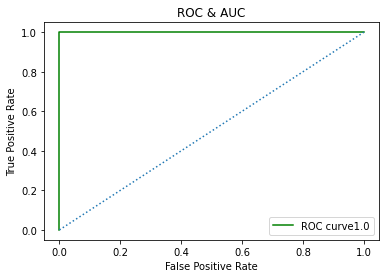

In [27]:
FP, TP, thresholds = roc_curve(best_train_y, y_train_predict)
# FP:[0., 0., 1.]
# TP:[0., 1., 1.]
# ---->>> [(0,0), (0,1), (1,1)]

area = auc(FP, TP)
plt.title('ROC & AUC')
plt.plot(FP, TP, color = 'Green', label = 'ROC curve' + str(area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [28]:
for i in range(len(testing_list)):  
    # label bending or not
    if i<6:
        testing_list[i]['bending'] = 'True'
    else:
        testing_list[i]['bending'] = 'False'

In [29]:
from sklearn import metrics

test_data = breakSeries(testing_list, best_l_rfe) 
test_x_data, test_y = split_x_y(test_data)
test_x = cal_x_train(test_x_data).iloc[:, [31, 74, 133, 175, 176, 193, 194]]

model = LogisticRegression(max_iter = 500)
model.fit(test_x, test_y)
y_test_predict = model.predict(test_x)

test_accuracy = metrics.accuracy_score(test_y, y_test_predict)

print("The Test Accuracy is: ", test_accuracy)
print("The Train Accuracy is: ", train_accuracy)

The Test Accuracy is:  1.0
The Train Accuracy is:  1.0


#### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes! Thus, I modify the max-iter parameter as 500.

#### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes. There are 60 non-bending classes and only 9 bending classes, so it is imbalanced.

In [30]:
from imblearn.over_sampling import RandomOverSampler

# resample the data
# before --->   bending/unbending = 9/60
# after  --->   bending/unbending = 60/60

ros = RandomOverSampler(random_state = 0)
X_resampled, y_resampled = ros.fit_resample(best_train_x, best_train_y)
model = LogisticRegression(max_iter = 500)
model.fit(X_resampled, y_resampled)
y_resample_predict = model.predict(X_resampled)

=================Confusion Matrix=================
[[60  0]
 [ 0 60]]
=================Parameters=================
31     0.013764
74    -0.013283
133   -0.025764
175    0.071544
176   -0.035675
193   -0.105753
194    0.120939
dtype: float64 

=================AUC =================
1.0


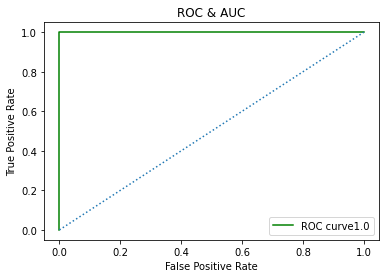

In [31]:
resample_accuracy = metrics.accuracy_score(y_resampled, y_resample_predict)

resample_conf_matrix = confusion_matrix(y_resampled, y_resample_predict)
print('=================Confusion Matrix=================')
print(resample_conf_matrix)

re_ol = sm.OLS(y_resampled,X_resampled).fit()
# Statsmodels
print('=================Parameters=================')
print(re_ol.params, '\n')


r_FP, r_TP, r_thresholds = roc_curve(y_resampled, y_resample_predict)

r_area = auc(r_FP, r_TP)
print('=================AUC =================')
print(r_area)

plt.title('ROC & AUC')
plt.plot(r_FP, r_TP, color = 'Green', label = 'ROC curve' + str(r_area))
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Repeat 2(a)iii using L1-penalized logistic regression, i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [32]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [34]:
# it takes 2-3 mins to run, please wait, thanks
l1_l_score = dict()
for l in range(1,21):
    l1_data_set = breakSeries(training_list, l) 
    l1_train_x_data, l1_train_y = split_x_y(l1_data_set)   
    l1_train_x = cal_x_train(l1_train_x_data)

    l1_train__normalize_x_data = preprocessing.scale(l1_train_x)
    
    model = LogisticRegressionCV(penalty = 'l1', cv = 5, solver = 'liblinear').fit(l1_train__normalize_x_data, l1_train_y)
    
    print("======================================================")
    print('L: ', l)
    print('Accuracy: ', model.score(l1_train__normalize_x_data, l1_train_y))
    print('C: ', model.C_)
    
    l1_l_score[l] = [model.score(l1_train__normalize_x_data, l1_train_y), model.C_[0]]
#l1_scores = {k: v for k, v in sorted(l1_l_score.items(), key=lambda item: item[1], reverse=True)}

L:  1
Accuracy:  1.0
C:  [21.5443469]
L:  2
Accuracy:  0.9855072463768116
C:  [0.35938137]
L:  3
Accuracy:  0.9710144927536232
C:  [0.35938137]
L:  4
Accuracy:  0.9710144927536232
C:  [0.35938137]
L:  5
Accuracy:  0.9710144927536232
C:  [0.35938137]
L:  6
Accuracy:  0.9710144927536232
C:  [0.35938137]
L:  7
Accuracy:  0.9710144927536232
C:  [0.35938137]
L:  8
Accuracy:  0.9710144927536232
C:  [0.35938137]
L:  9
Accuracy:  1.0
C:  [2.7825594]
L:  10
Accuracy:  1.0
C:  [2.7825594]
L:  11
Accuracy:  1.0
C:  [1291.54966501]
L:  12
Accuracy:  1.0
C:  [2.7825594]
L:  13
Accuracy:  0.9710144927536232
C:  [0.35938137]
L:  14
Accuracy:  1.0
C:  [2.7825594]
L:  15
Accuracy:  1.0
C:  [2.7825594]
L:  16
Accuracy:  1.0
C:  [2.7825594]
L:  17
Accuracy:  1.0
C:  [2.7825594]
L:  18
Accuracy:  0.9855072463768116
C:  [0.35938137]
L:  19
Accuracy:  1.0
C:  [2.7825594]
L:  20
Accuracy:  1.0
C:  [2.7825594]


In [35]:
candidate = list()
for i in l1_l_score:
    if l1_l_score[i][0] == max(l1_l_score.values())[0]:
        candidate.append(i)
print("All of L: " + str(candidate) + " can generate the optimal accuracy : " + str(max(l1_l_score.values())[0]))

All of L: [1, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20] can generate the optimal accuracy : 1.0


Actually, the accuracy above is just regarding the cross-validation error rate, we should then refit the model with our selected value of tunung parameter.  
But in this question, it's not asked.(We just need to find the best λ)

#### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

I think L1-penalized is better (higher accuracy) and much easier to implement (easier coding and less running time)!


### (c) Multi-class Classification (The Realistic Case)

#### i. Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [36]:
def add_label(dataset, category):
    multi_train_x_set = list()
    multi_train_y_set = list()
    
    multi_test_x_set = list()
    multi_test_y_set = list()
    
    count_train = 0
    count_test = 0
    
    if category == 'training':
        for ds in dataset:
            count_train += 1
            # to store all the data except the bending col in original dataset
            multi_train_x_set.append(ds.iloc[:,:-1])
            
            if count_train <= 9:
                multi_train_y_set.append(0)
            elif count_train >= 10 and count_train <= 21:
                multi_train_y_set.append(1)
            elif count_train >= 22 and count_train <= 33:
                multi_train_y_set.append(2)
            elif count_train >= 34 and count_train <= 45:
                multi_train_y_set.append(3)
            elif count_train >= 46 and count_train <= 57:
                multi_train_y_set.append(4)
            else:
                multi_train_y_set.append(5)
                
        return multi_train_x_set, multi_train_y_set
        
    elif category == 'testing':
        for ds in dataset:
            count_test += 1
            multi_test_x_set.append(ds.iloc[:,:-1])
            
            if count_test <= 4:
                multi_test_y_set.append(0)
            elif count_test >= 5 and count_test <= 7:
                multi_test_y_set.append(1)
            elif count_test >= 8 and count_test <= 10:
                multi_test_y_set.append(2)
            elif count_test >= 11 and count_test <= 13:
                multi_test_y_set.append(3)
            elif count_test >= 14 and count_test <= 16:
                multi_test_y_set.append(4)
            else:
                multi_test_y_set.append(5)
        
        return multi_test_x_set, multi_test_y_set

In [48]:
# it might take anout 3-5 mins to run
multi_best_cv_score = 0
multi_best_l = 0

for l in range(1, 21):
    # training_set
    multi_train_data_set = breakSeries(training_list, l)
    multi_train_data_x, multi_train_y = add_label(multi_train_data_set, 'training')
    multi_train_x = cal_x_train(multi_train_data_x)

    multi_train__normalize_x_data = preprocessing.scale(l1_train_x)
    
    model = LogisticRegressionCV(penalty = 'l1', cv = 5, solver = 'liblinear').fit(multi_train__normalize_x_data, multi_train_y)
    #score = model.score(multi_train__normalize_x_data, multi_train_y)
    cv_score = cross_val_score(model, multi_train__normalize_x_data, multi_train_y, cv = 5, scoring = 'accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > multi_best_cv_score:
        multi_best_cv_score = mean_score
        multi_best_l = l
        best_C = model.C_[0]
print("The best L-value Multiclass Log Reg L1 penalty is : ", multi_best_l )
print("The best C-value Multiclass Log Reg L1 penalty is : " ,best_C )
print("Optimal CV score Multiclass Log Reg L1 penalty is: " , multi_best_cv_score)

The best L-value Multiclass Log Reg L1 penalty is :  2
The best C-value Multiclass Log Reg L1 penalty is :  2.782559402207126
Optimal CV score Multiclass Log Reg L1 penalty is:  0.8263736263736263


In [38]:
# train_set
multi_train_data_set = breakSeries(training_list, multi_best_l)
multi_train_data_x, multi_train_y = add_label(multi_train_data_set, 'training')
multi_train_x = cal_x_train(multi_train_data_x)

multi_train__normalize_x_data = preprocessing.scale(multi_train_x)

# testing_set
multi_test_data_set = breakSeries(testing_list, multi_best_l)
multi_test_data_x, multi_test_y = add_label(multi_test_data_set, 'testing')
multi_test_x = cal_x_train(multi_test_data_x)

multi_test__normalize_x_data = preprocessing.scale(multi_test_x )

model = LogisticRegressionCV(penalty = 'l1', cv = 5, solver = 'liblinear').fit(multi_train__normalize_x_data, multi_train_y)
multi_predict_y = model.predict(multi_test__normalize_x_data)


In [39]:
cnfMatrix = metrics.confusion_matrix(multi_test_y, multi_predict_y, labels=[0,1,2,3,4,5])
print('confusion matrix\n', cnfMatrix)

accuracy = metrics.accuracy_score(multi_test_y, multi_predict_y)
print("Test Error: ", 1-accuracy )

confusion matrix
 [[3 0 0 0 1 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 0 3]]
Test Error:  0.1578947368421053


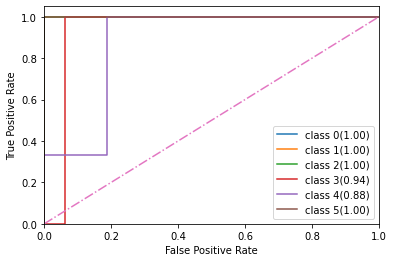

In [40]:
y_scores = model.decision_function(multi_test__normalize_x_data)

fpr = dict()
tpr = dict()
r_area = dict()

for i in range(6):
    fpr[i], tpr[i], threshold = roc_curve(multi_test_y, y_scores[:, i], pos_label = i)
    r_area[i] = auc(fpr[i], tpr[i])

for i in range(6):
    plt.plot(fpr[i], tpr[i], label = f'class {i}(%0.2f)'%r_area[i])

    
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### ii. Repeat 2(c)i using a Naive Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
nb_best_cv_score = 0
nb_best_l = 0

for l in range(1, 21):
    # training_set
    multi_train_data_set = breakSeries(training_list, l)
    multi_train_data_x, multi_train_y = add_label(multi_train_data_set, 'training')
    multi_train_x = cal_x_train(multi_train_data_x)

 
    model = GaussianNB().fit(multi_train_x, multi_train_y)
    cv_score = cross_val_score(model, multi_train_x, multi_train_y, cv = 5, scoring = 'accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > nb_best_cv_score:
        nb_best_cv_score = mean_score
        nb_best_l = l
print("The best L-value Multiclass Log Reg L1 penalty is : ", nb_best_l )
print("Optimal CV score Multiclass Log Reg L1 penalty is: " , nb_best_cv_score)

The best L-value Multiclass Log Reg L1 penalty is :  12
Optimal CV score Multiclass Log Reg L1 penalty is:  0.798901098901099


In [43]:
# train_set
nb_train_data_set = breakSeries(training_list, nb_best_l)
nb_train_data_x, nb_train_y = add_label(nb_train_data_set, 'training')
nb_train_x = cal_x_train(nb_train_data_x)

# testing_set
nb_test_data_set = breakSeries(testing_list, nb_best_l)
nb_test_data_x, nb_test_y = add_label(nb_test_data_set, 'testing')
nb_test_x = cal_x_train(nb_test_data_x)

model = GaussianNB().fit(nb_train_x, nb_train_y)
nb_predict_y = model.predict(nb_test_x)

In [44]:
nb_Matrix = metrics.confusion_matrix(nb_test_y, nb_predict_y, labels=[0,1,2,3,4,5])
print('confusion matrix\n', nb_Matrix )

accuracy = metrics.accuracy_score(nb_test_y, nb_predict_y)
print("Test Error: ", 1-accuracy )

confusion matrix
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [1 0 2 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]
Test Error:  0.1578947368421053


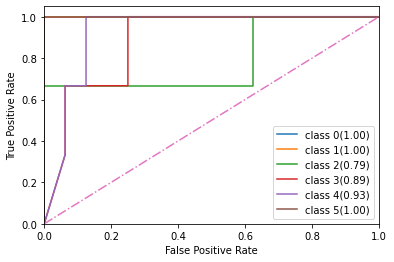

In [45]:
y_scores = model.predict_log_proba(nb_test_x)

fpr = dict()
tpr = dict()
r_area = dict()

for i in range(6):
    fpr[i], tpr[i], threshold = roc_curve(nb_test_y, y_scores[:, i],pos_label=i)
    r_area[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(6):
    plt.plot(fpr[i],tpr[i],label = f'class {i}(%0.2f)'%r_area[i])

    
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### iii. Which method is better for multi-class classification in this problem?

In this problem, I got test error 0.105 in multinomial regression and 0.158 in Naive Bayes, so I think multinomial is better.